<h2 style="color:blue" align="center"> WTF23 DATA SCIENCE AND ARTIFICAIL INTELLIGENCE </h2>
<h2 style="color:blue" align="center"> GROUP C SUBGROUP 1 </h2>
<h2 style="color:blue" align="center"> CLASSWORK ON MULTICLASSIFICATION USING LOGISTIC REGRESION</h2>

<h3>Exercise</h3>

<p> Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy 
of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1. Sepal Length
2. Sepal Width 
3. Petal Length 
4. Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

1. Setosa
2. Versicolour
3. Virginica
</p>

<h1> SOLUTION</h1>
<h5> Import Libraries and Load Dataset</h5>
<p> We start by importing necessary libraries for loading dataset, data manipulation, visualization, and building models. There are five (5) columns and 150 rows of which four(4) of the features are float while one (1) is object. We also group the data set by its species and noticed we have a balanced data set as all have equal number of instances.<br> We will then split the data set into train-test so we can perform EDA and build our model.</p>

In [1]:
# import basic libraries and read data
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

#for graphs, visuals, etc.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#for modelbuilding
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

In [2]:
#data= pd.read_csv('iris_dataset.csv')
# load through url
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data = pd.read_csv(url, names = attributes)
data.columns = attributes

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [6]:
#Rename "class" column to avoid conflict with inbuilt function
data.rename(columns = {'sepal_length':'sepal_length', 'sepal_width':'sepal_width', 'petal_length':'petal_length', 'petal_width':'petal_width', 'class':'target'}, inplace = True)

In [7]:
#Check the distribution of the data set by target
data.groupby('target').size()

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<h5 style="color:orange" align="justify"> Train-Test Split </h5>

<p> Now, we can split the dataset into a training set and a test set. The test set will be use for the purpose of reporting and validation of our model. In addition, I used either a stratified hold-out approach or cross validation to estimate model accuracy if the need arise.</p> 
<p> Generally, the rule of thumb is have 20–30% of dataset as the test set but due to the size of our dataset, we will take 40% to ensure there are enough data points to test the model performance.</p>

<b> The essence of splitting data into the training and test data before performing EDA is to enable us explore the training set extensively and make all necessary adjustment to the training data before validating our model with the test data set, which ofcourse is the essence of the train-test data split.</b>



In [8]:
train, test = train_test_split(data, test_size = 0.4, stratify = data['target'], random_state = 12)

<h5 style="color:orange" align="justify"> EXPLORATORY DATA ANALYSIS </h5>

<b><p>Perform a plot of univariate histogram plot of the features. From the plot, both petal_length and petal_width have some group of data points that have smaller values than the others, suggesting that there might be different groups in this data.</p></b>

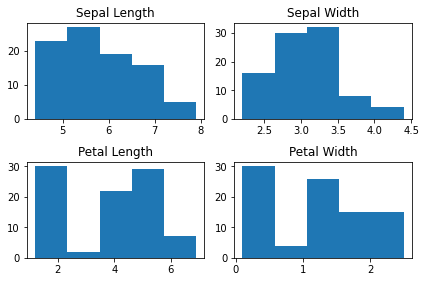

In [9]:
n_bins = 5
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');
title= ('Univariate Histogram plot of the features')
# add some spacing between subplots
fig.tight_layout(pad=1.0);

<p><b> Performing scatterplots of all-paired attributes by using seaborn’s pairplot function reveal that some variables are highly correlated, e.g., petal_length and petal_width. In addition, the petal measurements separate the different species better than the sepal ones. Same was observed with the parallel plot. </b></p>.

<b>A corresponding correlation matrix to quantitatively examine the relationship between variables is also produced. The following are the takebacks form the correlation matrix:</b>

<br>1. Petal measurements have highly positive correlation<br>
<br>2. Sepal measurements are uncorrelated. <br>
<br>3. Petal features also have relatively high correlation with sepal_length, but not with sepal_width.<br>

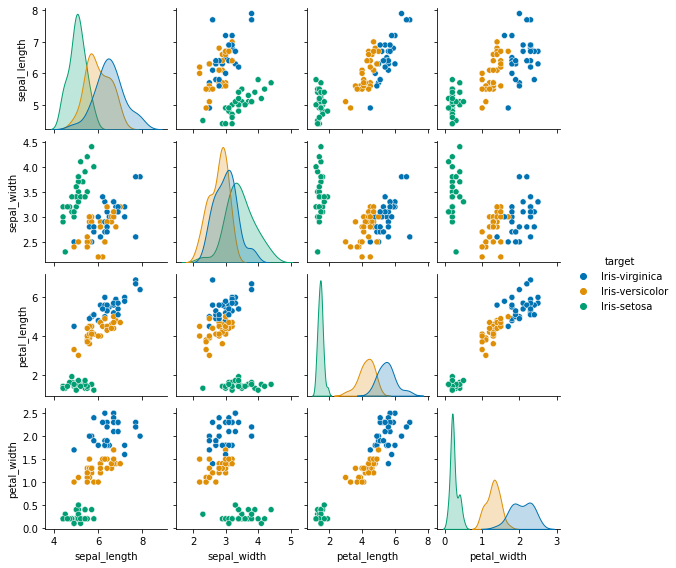

In [10]:
# pairplot to show bivariate relationship scatterplot matrix
sns.pairplot(train, hue="target", height = 2, palette = 'colorblind');

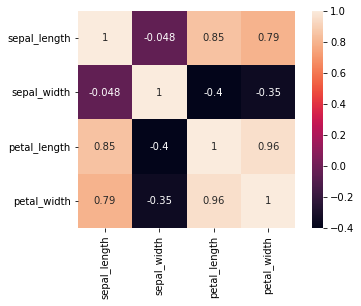

In [11]:
#Correlation heatmap
coplt = train.corr()
sns.heatmap(coplt, annot = True, square = True);

<AxesSubplot:>

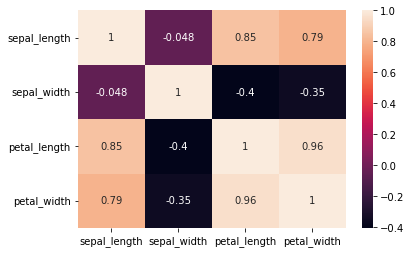

In [12]:
sns.heatmap(train.drop('target', axis=1).corr(), annot= True)

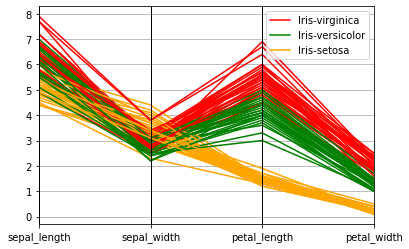

In [13]:
#parallel cordinate plot
parallel_coordinates(train, "target", color = ['red', 'green', 'orange']);

<h3> Building logistic regression model </h3>

In [14]:
# Model development
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.target
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.target

In [15]:
# Logistic regression
modelr = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)
prediction=modelr.predict(X_test)
print('The accuracy of the Logistic Regression is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Logistic Regression is 0.950


In [16]:
modelr.score(X_train, y_train)

0.9888888888888889

In [17]:
modelr.score(X_test, y_test)

0.95

In [18]:
#y_pred= modelr.predict(X_test)
prediction

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris

In [19]:
confusion_matrix(y_test, prediction)

array([[20,  0,  0],
       [ 0, 18,  2],
       [ 0,  1, 19]], dtype=int64)

In [20]:
print (classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.95      0.90      0.92        20
 Iris-virginica       0.90      0.95      0.93        20

       accuracy                           0.95        60
      macro avg       0.95      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60



<h3> Conclusion</h3>
<p> Our trained model was able to capture all the iris species classes of the dataset at about 98% accuracy.</p>
<p> The test model score was about 95% accuracy, which is also a very good one. Showing that our tain model is actually not overfiting the model.</p>
<p> We explored the Iris dataset, and then built a multiclass logistic classifiers using sklearn. We saw that the petal measurements are more helpful at classifying instances of flowers than the sepal ones. Furthermore, ourmodels achieved a test accuracy of 95%.</p>